# Execution Time
---
Timothy Helton

---
### Imports

In [1]:
from collections import OrderedDict
from timeit import timeit

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

---
### Variables

In [2]:
milli_formatter = FuncFormatter(
    lambda x, position: f'{x * 1e3:.3f} ms')

label_size = 14
sup_title_size = 24
title_size = 18

---
### Framework

In [3]:
labels = [
    'Pure Numpy',
    'Pure Pandas',
    'Pandas Wrapped by Numpy',
    'Pandas Numpy Calc'
]

In [4]:
def time_algorithms(algorithms, n_executions=10000):
    """Time execution of various algorithms.
    
    :param dict algorithms: algorithms to be executed
    :param int n_executions: number of executions per algorithm
    """
    result = []

    # Pure Numpy
    result.append(timeit(algorithms['Pure Numpy'],
                         setup=setup_numpy,
                         number=n_executions))

    # Pure Pandas
    result.append(timeit(algorithms['Pure Pandas'],
                         setup=setup_pandas,
                         number=n_executions))

    # Pandas Wrapped by Numpy
    result.append(timeit(algorithms['Pandas Wrapped by Numpy'],
                         setup=setup_pandas,
                         number=n_executions))

    # Pandas Sent to Numpy then Recreated in Pandas
    result.append(timeit(algorithms['Pandas Numpy Calc'],
                         setup=setup_pandas,
                         number=n_executions))

    times = np.array(result)
    cycle_times = times / n_executions
    normalized_times = times / times.min()

    return pd.DataFrame(np.c_[cycle_times, normalized_times],
                        index=labels,
                        columns=['actual_time', 'normalized_time'])

In [5]:
def plot_results(results, title, save=False):
    """Plot execution times.
    
    :param DataFrame results: data to be plotted
    :param str title: title of plot
    :param bool save: if True the plot will be saved to disk
    """
    fig = plt.figure('Overview Box Plot', figsize=(10, 5),
                     facecolor='white', edgecolor='black')
    rows, cols = (1, 2)
    ax0 = plt.subplot2grid((rows, cols), (0, 0))
    ax1 = plt.subplot2grid((rows, cols), (0, 1))
        
    # bar plot
    (results.actual_time
         .plot(kind='bar', alpha=0.5, edgecolor='black', ax=ax0))

    ax0.set_title('Actual Times', fontsize=title_size)
    ax0.set_ylabel('Time (s)', fontsize=label_size)
    ax0.yaxis.set_major_formatter(milli_formatter)
    
    # normalizd bar plot
    (results.normalized_time
         .plot(kind='bar', alpha=0.5, color='crimson',
               edgecolor='black', ax=ax1))

    for p in ax1.patches:
        ax1.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            textcoords='offset points',
            va='center',
            xytext=(0, 5), 
        )
    
    ax1.set_title('Normalized Times', fontsize=title_size)

    for ax in (ax0, ax1):
        ax.set_xlabel('Algorithms', fontsize=label_size)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),
                           rotation=75)
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=sup_title_size, y=1.05)

    if save:
        plt.savefig(f'{title}.png', bbox_inches='tight',
                    bbox_extra_artists=[sup_title_size])
    else:
        plt.show()

---
### Pandas Series Numerical Operations

- Numerical methods for Pandas are located down the stack resulting in a time delay.
- Converting to a Numpy array and then back to a DataFrame increases speed.

In [6]:
initialize = OrderedDict({
    'numpy': ('import numpy as np;'
              'arr = np.arange(1e6)'),
    'pandas': ('import pandas as pd;'
               's = pd.Series(arr)'),
})
setup_numpy = initialize['numpy']
setup_pandas = ';'.join(initialize.values())

#### Addition

In [7]:
calls = (
    'arr.sum()',
    's.sum()',
    'np.sum(s)',
    'pd.Series(s.values.sum())',
)
algorithms = {x: y for x, y in zip(labels, calls)}
addition = time_algorithms(algorithms, 1000)

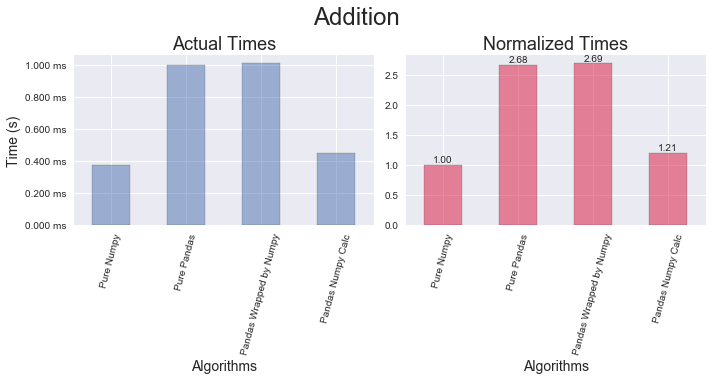

In [8]:
plot_results(addition, 'Addition')

#### Multiplication

In [9]:
calls = (
    'arr.prod()',
    's.prod()',
    'np.prod(s)',
    'pd.Series(s.values.prod())',
)
algorithms = {x: y for x, y in zip(labels, calls)}
multiplication = time_algorithms(algorithms, 1000)

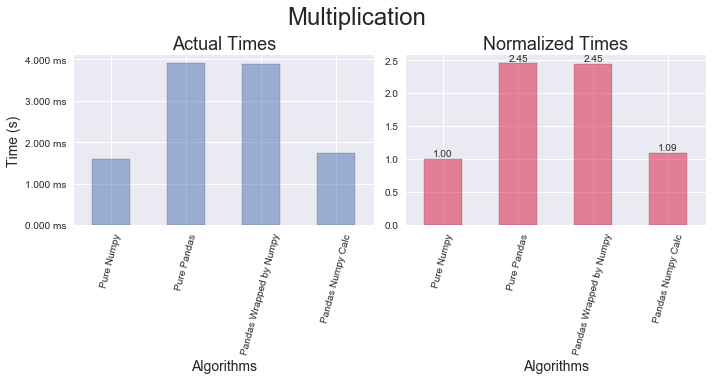

In [10]:
plot_results(multiplication, 'Multiplication')

---

### Pandas DataFrame Apply

In [11]:
initialize = OrderedDict({
    'numpy': ('import numpy as np;'
              'arr = np.arange(1e6).reshape(1000, 1000)'),
    'pandas': ('import pandas as pd;'
               's = pd.DataFrame(arr)'),
})
setup_numpy = initialize['numpy']
setup_pandas = ';'.join(initialize.values())

#### Addition Down Columns

In [12]:
calls = (
    'arr.sum()',
    's.apply(lambda x: x.sum())',
    'np.sum(s)',
    'pd.Series(s.values.sum())',
)
algorithms = {x: y for x, y in zip(labels, calls)}
apply_addition = time_algorithms(algorithms, 1000)

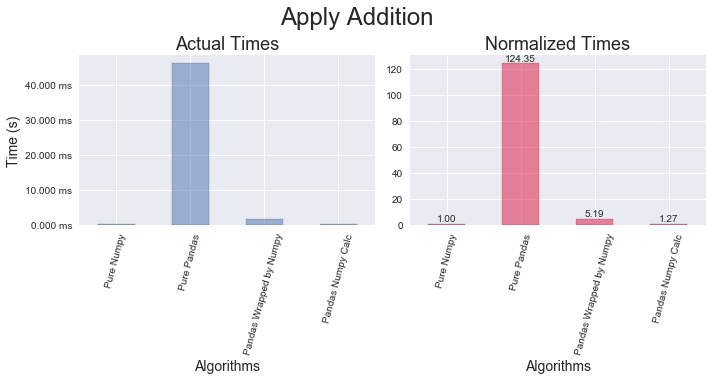

In [13]:
plot_results(apply_addition, 'Apply Addition')

#### Multiplication Down Columns

In [14]:
calls = (
    'arr.prod()',
    's.apply(lambda x: x.prod())',
    'np.prod(s)',
    'pd.Series(s.values.prod())',
)
algorithms = {x: y for x, y in zip(labels, calls)}
apply_prod = time_algorithms(algorithms, 1000)

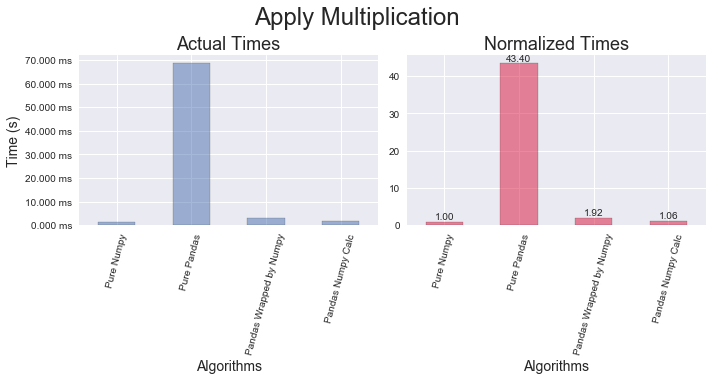

In [15]:
plot_results(apply_prod, 'Apply Multiplication')

#### Addition Across Columns

In [16]:
calls = (
    'arr.sum(axis=1)',
    's.apply(lambda x: x.sum(), axis=1)',
    'np.sum(s, axis=1)',
    'pd.Series(s.values.sum(axis=1))',
)
algorithms = {x: y for x, y in zip(labels, calls)}
apply_across_add = time_algorithms(algorithms, 1000)

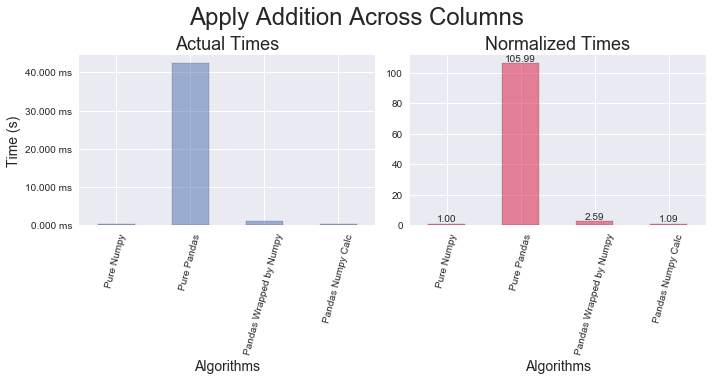

In [17]:
plot_results(apply_across_add, 'Apply Addition Across Columns')

#### Multiplication Across Columns

In [18]:
calls = (
    'arr.prod(axis=1)',
    's.apply(lambda x: x.prod(), axis=1)',
    'np.prod(s, axis=1)',
    'pd.Series(s.values.prod(axis=1))',
)
algorithms = {x: y for x, y in zip(labels, calls)}
apply_across_prod = time_algorithms(algorithms, 1000)

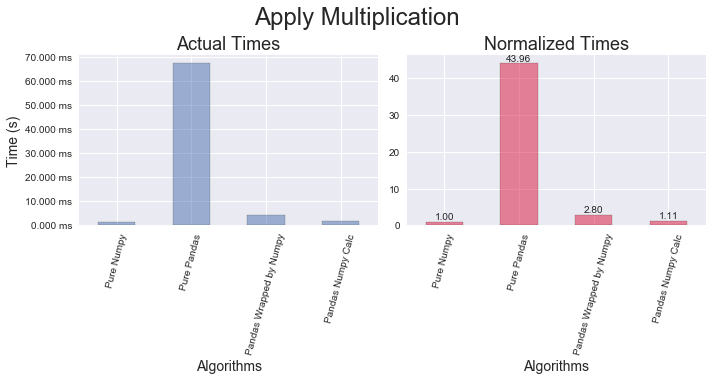

In [19]:
plot_results(apply_across_prod, 'Apply Multiplication')